In [ ]:
from torchvision.models.segmentation.deeplabv3 import DeepLabV3_ResNet101_Weights

In [37]:
import torch


def load_model():
    # Load the DeepLab v3 model to system
    device = "cpu"
    model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
    model.to(device).eval()
    return model

In [38]:
model = load_model()

Using cache found in C:\Users\Nitcu/.cache\torch\hub\pytorch_vision_v0.6.0
C:\MySpace\Programs\anaconda3\envs\cvenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\MySpace\Programs\anaconda3\envs\cvenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [39]:
import cv2
from PIL import Image
import torchvision

image = Image.open('C:\\MySpace\\Projects\GenerImages\lab4\images\\origin\photo3.png')

img = torchvision.transforms.PILToTensor()(image)
img = img.unsqueeze(dim=0) / 255
out = model(img)

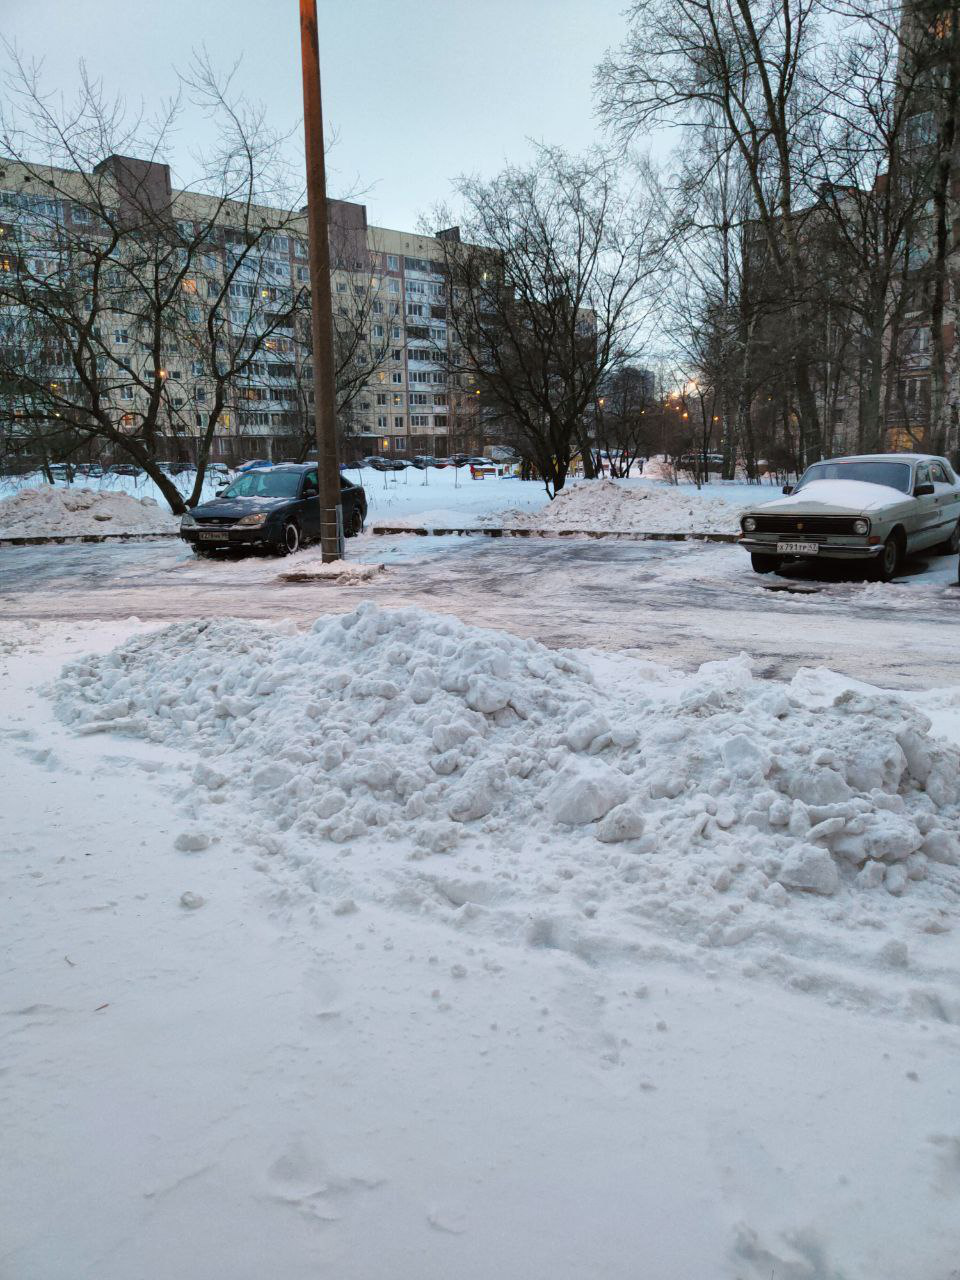

In [40]:
image

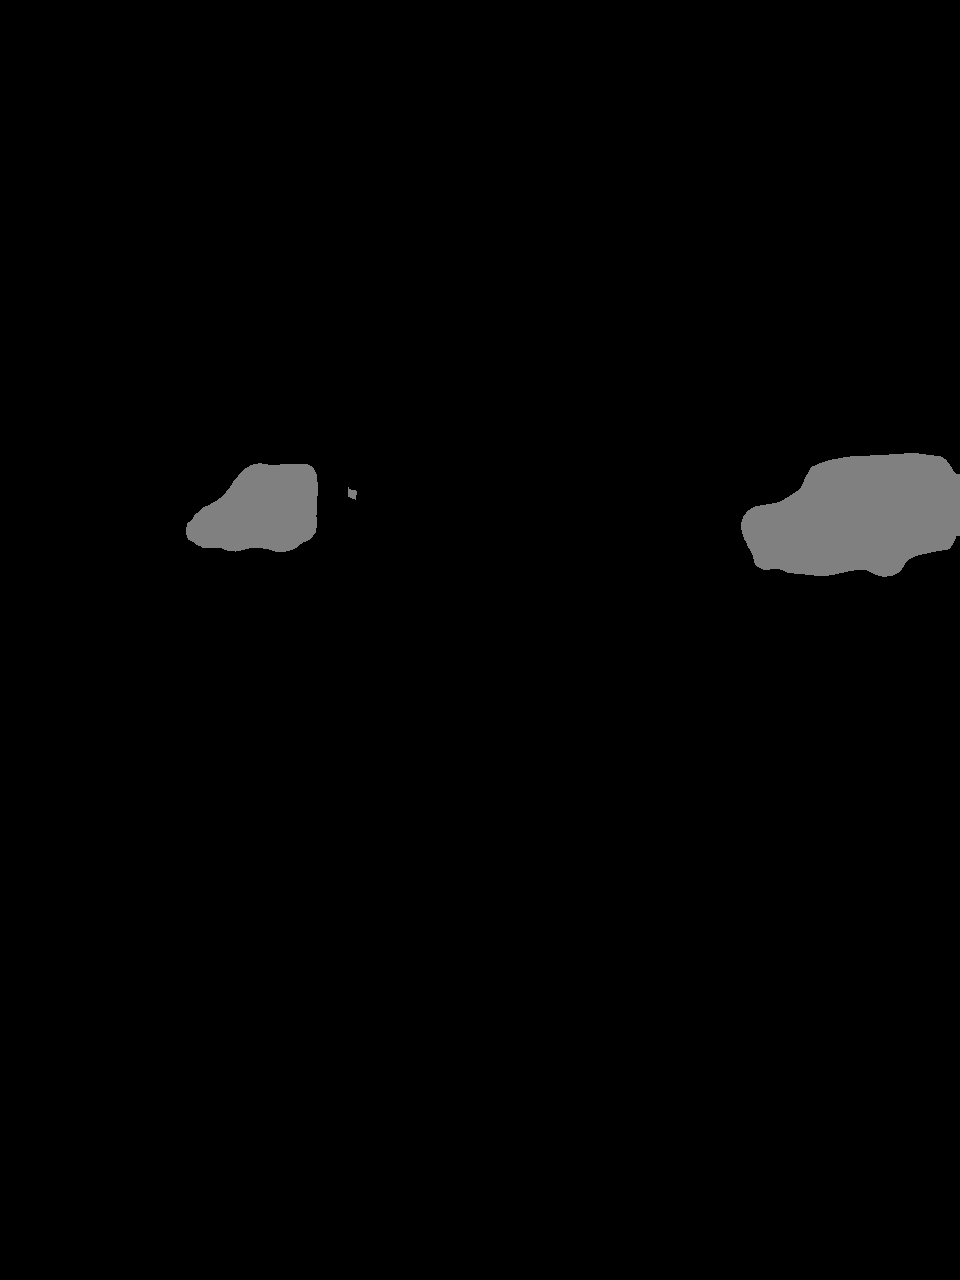

In [41]:
import numpy as np

label_map = [
               (0, 0, 0),  # background
               (128, 0, 0), # aeroplane
               (0, 128, 0), # bicycle
               (128, 128, 0), # bird
               (0, 0, 128), # boat
               (128, 0, 128), # bottle
               (0, 128, 128), # bus
               (128, 128, 128), # car
               (64, 0, 0), # cat
               (192, 0, 0), # chair
               (64, 128, 0), # cow
               (192, 128, 0), # dining table
               (64, 0, 128), # dog
               (192, 0, 128), # horse
               (64, 128, 128), # motorbike
               (192, 128, 128), # person
               (0, 64, 0), # potted plant
               (128, 64, 0), # sheep
               (0, 192, 0), # sofa
               (128, 192, 0), # train
               (0, 64, 128) # tv/monitor
]
outputs = out['out']
labels = torch.argmax(outputs.squeeze(), dim=0).detach().cpu().numpy()
red_map = np.zeros_like(labels).astype(np.uint8)
green_map = np.zeros_like(labels).astype(np.uint8)
blue_map = np.zeros_like(labels).astype(np.uint8)

for label_num in range(0, len(label_map)):
    index = labels == label_num
    red_map[index] = np.array(label_map)[label_num, 0]
    green_map[index] = np.array(label_map)[label_num, 1]
    blue_map[index] = np.array(label_map)[label_num, 2]
    segmentation_map = np.stack([red_map, green_map, blue_map], axis=2)
Image.fromarray(segmentation_map)

In [42]:
segmentation_map.shape, img.shape

((1280, 960, 3), torch.Size([1, 3, 1280, 960]))

In [43]:
masked = torchvision.utils.draw_segmentation_masks(torch.tensor(img * 255, dtype=torch.uint8)[0], torch.tensor(segmentation_map == 128, dtype=bool).permute(2, 0, 1))

C:\Users\Nitcu\AppData\Local\Temp\ipykernel_16108\1479823747.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masked = torchvision.utils.draw_segmentation_masks(torch.tensor(img * 255, dtype=torch.uint8)[0], torch.tensor(segmentation_map == 128, dtype=bool).permute(2, 0, 1))


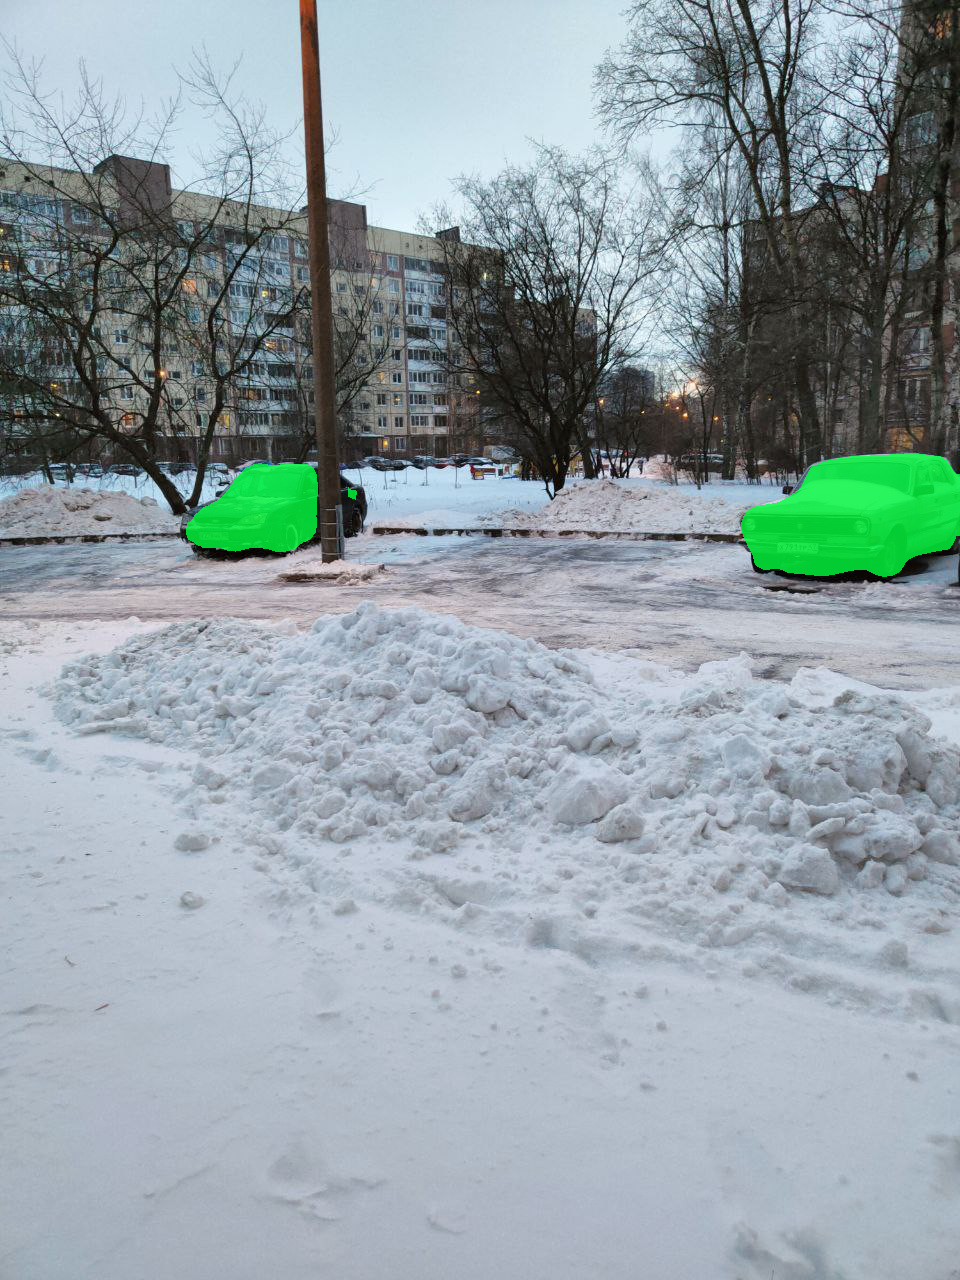

In [44]:
Image.fromarray(masked.permute(1, 2, 0).detach().numpy())

In [45]:
import numpy as np
from utils import *

masks = segmentation_map.copy()
cv2.imwrite('images/mask3.png', masks)

True